In [1]:
import VFF
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [55]:
X = np.random.rand(100, 2)
Y = np.sin(3 * X[:, :1]) * np.sin(5 * X[:, 1:]) + np.random.randn(X.shape[0], 1) * 0.1
# Y = np.sin(8 * X[:, 1:])

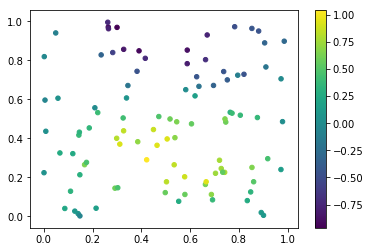

In [56]:
plt.scatter(X[:, 0], X[:, 1], 20, Y[:, 0])
plt.colorbar()

In [64]:
m = VFF.gpr.GPRKron(X, Y, np.arange(18), np.array([-1, -1]), np.array([2, 2]), [GPflow.kernels.Matern12(1), GPflow.kernels.Matern12(1)])
m.likelihood.variance = 0.1


In [65]:
k = GPflow.kernels.Matern32(1) * GPflow.kernels.Matern32(1, active_dims=[1]) + GPflow.kernels.White(1)
m0 = GPflow.gpr.GPR(X, Y, kern=k)
m0.likelihood.variance = 0.1

In [66]:
m.optimize()
m0.optimize()

      fun: -45.779183835929516
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -4.16419685e-06,   6.66518484e-06,  -1.31283273e-05,
         6.66518483e-06,   1.92558733e-07,   2.75248998e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 14
   status: 0
  success: True
        x: array([-0.5816852 , -0.65854351, -0.84389603, -0.65854351, -7.34731781,
       -4.67885514])

In [67]:
m

Name,values,prior,constraint
model.kerns.item0.lengthscales,[ 0.61889174],None,+ve
model.kerns.item0.variance,[ 0.26679497],None,+ve
model.kerns.item1.lengthscales,[ 0.40846014],None,+ve
model.kerns.item1.variance,[ 0.26679497],None,+ve
model.likelihood.variance,[ 0.01991182],None,+ve


In [68]:
m0

Name,values,prior,constraint
name.kern.prod.matern32_1.lengthscales,[ 0.44401712],None,+ve
name.kern.prod.matern32_1.variance,[ 0.41713422],None,+ve
name.kern.prod.matern32_2.lengthscales,[ 0.35769771],None,+ve
name.kern.prod.matern32_2.variance,[ 0.41713422],None,+ve
name.kern.white.variance,[ 0.00064511],None,+ve
name.likelihood.variance,[ 0.00924776],None,+ve


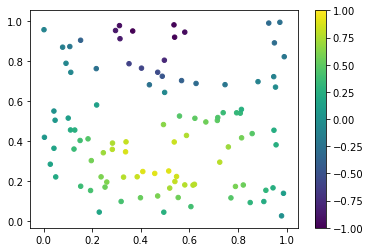

In [69]:
Xtest = np.random.rand(100,2)
mu, var = m0.predict_f(Xtest)
plt.scatter(Xtest[:, 0], Xtest[:, 1], 20, mu[:, 0], vmin=-1, vmax=1)
plt.colorbar()

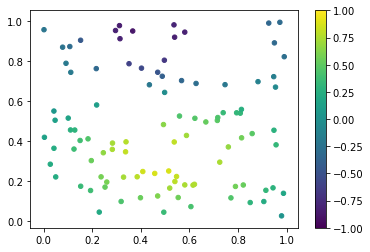

In [70]:
mu, var = m.predict_f(Xtest)
plt.scatter(Xtest[:, 0], Xtest[:, 1], 20, mu[:, 0], vmin=-1, vmax=1)
plt.colorbar()